<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/121_model_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install spacy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
import spacy
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!pip install cleantext
import cleantext

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Read the Example1.txt
FC = "/content/04. Time Management author Brian Tracy (1).txt"
file1 = open(FC, "r")

In [9]:
# Open file using with

with open(FC, "r") as file1:
    content = file1.read()
    print(content)

THE BRIAN TRACY SUCCESS LIBRARY

BRIAN TRACY

i
MANAGEMENT

  
TIME MANAGEMENT

American Management Association / www.amanet.org
American Management Association / www.amanet.org
TIME
MANAGEMENT

BRIAN TRACY

*AMACOM americAN MANAGEMENT ASSOCIATION
New York = Atlanta = Brussels = Chicago += Mexico City
San Francisco » Shanghai = Tokyo = Toronto «= Washington, D.C.

American Management Association / www.amanet.org
 

Bulk discounts available. For details visit:
www.amacombooks.org/go/specialsales

Or contact special sales:

Phone: 800-250-5308 / E-mail: specialsls@amanet.org
View all the AMACOM titles at: www.amacombooks.org

 

 

 

This publication is designed to provide accurate and authoritative information in
regard to the subject matter covered. It is sold with the understanding that the
publisher is not engaged in rendering legal, accounting, or other professional
service. If legal advice or other expert assistance is required, the services of acom-
petent professional person

In [13]:
len(content)


165312

In [47]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = content
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [48]:
one_block

'THE BRIAN TRACY SUCCESS LIBRARY\n\nBRIAN TRACY\n\ni\nMANAGEMENT\n\n  \n\x0cTIME MANAGEMENT\n\nAmerican Management Association / www.amanet.org\n\x0cAmerican Management Association / www.amanet.org\n\x0cTIME\nMANAGEMENT\n\nBRIAN TRACY\n\n*AMACOM americAN MANAGEMENT ASSOCIATION\nNew York = Atlanta = Brussels = Chicago += Mexico City\nSan Francisco » Shanghai = Tokyo = Toronto «= Washington, D.C.\n\nAmerican Management Association / www.amanet.org\n\x0c \n\nBulk discounts available. For details visit:\nwww.amacombooks.org/go/specialsales\n\nOr contact special sales:\n\nPhone: 800-250-5308 / E-mail: specialsls@amanet.org\nView all the AMACOM titles at: www.amacombooks.org\n\n \n\n \n\n \n\nThis publication is designed to provide accurate and authoritative information in\nregard to the subject matter covered. It is sold with the understanding that the\npublisher is not engaged in rendering legal, accounting, or other professional\nservice. If legal advice or other expert assistance is requ

In [49]:
for token in doc_block[0:222222]:
    print(token, token.pos_)

Streaming output truncated to the last 5000 lines.
7 NUM
) PUNCT
. PUNCT


 SPACE
In ADP
the DET
brief ADJ
time NOUN
remaining VERB
, PUNCT
your DET
concentration NOUN
is AUX
steady ADJ
. PUNCT
Each DET

 SPACE
slide NOUN
you PRON
complete VERB
gives VERB
you PRON
a DET
sense NOUN
of ADP
satisfaction NOUN
and CCONJ
momentum NOUN
. PUNCT

 SPACE
You PRON
put VERB
together ADV
a DET
solid ADJ
presentation NOUN
— PUNCT
pleased VERB
to PART
have AUX
a DET
say NOUN
in ADP
your DET

 SPACE
team NOUN
’s PART
future NOUN
and CCONJ
confident ADJ
that SCONJ
you PRON
'll VERB
do AUX
a DET
good ADJ
enough ADJ
job NOUN
in ADP
the DET

 SPACE
morning NOUN
. PUNCT
When ADV
your DET
assistant ADJ
pops VERB
in ADP
to PART
hand VERB
you PRON
the DET
report NOUN
, PUNCT
you PRON

 SPACE
notice VERB
the DET
mistakes NOUN
. PUNCT
Instead ADV
of ADP
snapping NOUN
, PUNCT
you PRON
think VERB
about ADP
the DET
best ADJ

 SPACE
strategy NOUN
to PART
influence VERB
him PRON
to PART
give VERB
you PRON
the DET
ri

In [50]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:252222])

['contact', 'sales', 'Phone', 'E', '-', 'mail', 'View', 'titles', 'publication', 'designed', 'provide', 'information', 'regard', 'matter', 'covered', 'sold', 'understanding', 'publisher', 'engaged', 'rendering', 'accounting', 'service', 'advice', 'expert', 'assistance', 'required', 'services', 'acom-', 'petent', 'person', 'should', 'sought', 'Library', 'Publication', 'management', 'Pages', 'Includes', 'index', 'management', '©', 'rights', 'reserved', 'Printed', 'publication', 'may', 'reproduced', 'stored', 'retrieval', 'system', 'transmitted', 'part', 'form', 'means', 'recording', 'written', 'permission', 'division', 'world', 'leader', 'talent', 'development', 'advancing', 'skills', 'individuals', 'drive', 'business', 'success', 'mission', 'support', 'goals', 'individuals', 'organizations', 'range', 'products', 'services', 'including', 'classroom', 'seminars', 'webcasts', 'podcasts', 'conferences', 'government', 'solutions', 'business', 'books', 'research', 'approach', 'improving', 'pe

In [51]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,time,319
1,work,170
2,can,168
3,will,130
4,people,112
5,tasks,95
6,life,95
7,day,86
8,task,76
9,make,60


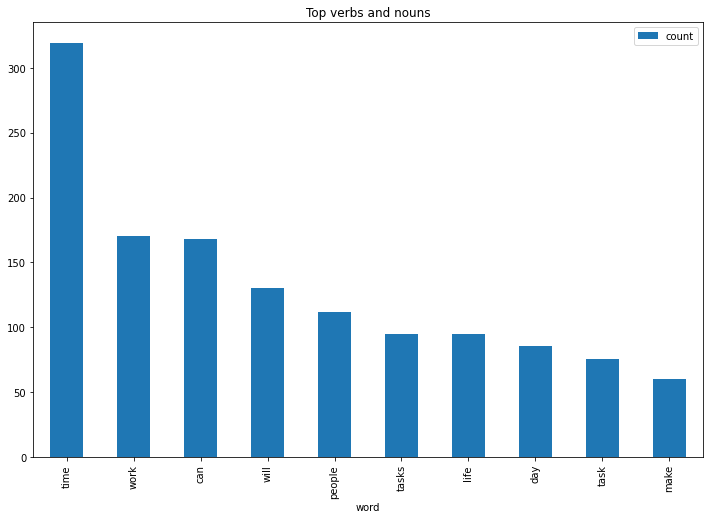

In [52]:
#Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [53]:
import string
no_punc_text = content.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'THE BRIAN TRACY SUCCESS LIBRARY\n\nBRIAN TRACY\n\ni\nMANAGEMENT\n\n  \n\x0cTIME MANAGEMENT\n\nAmerican Management Association  wwwamanetorg\n\x0cAmerican Management Association  wwwamanetorg\n\x0cTIME\nMANAGEMENT\n\nBRIAN TRACY\n\nAMACOM americAN MANAGEMENT ASSOCIATION\nNew York  Atlanta  Brussels  Chicago  Mexico City\nSan Francisco » Shanghai  Tokyo  Toronto « Washington DC\n\nAmerican Management Association  wwwamanetorg\n\x0c \n\nBulk discounts available For details visit\nwwwamacombooksorggospecialsales\n\nOr contact special sales\n\nPhone 8002505308  Email specialslsamanetorg\nView all the AMACOM titles at wwwamacombooksorg\n\n \n\n \n\n \n\nThis publication is designed to provide accurate and authoritative information in\nregard to the subject matter covered It is sold with the understanding that the\npublisher is not engaged in rendering legal accounting or other professional\nservice If legal advice or other expert assistance is required the services of acom\npetent professio

In [54]:
len(no_punc_text)

160665

In [55]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['THE', 'BRIAN', 'TRACY', 'SUCCESS', 'LIBRARY', 'BRIAN', 'TRACY', 'i', 'MANAGEMENT', 'TIME', 'MANAGEMENT', 'American', 'Management', 'Association', 'wwwamanetorg', 'American', 'Management', 'Association', 'wwwamanetorg', 'TIME', 'MANAGEMENT', 'BRIAN', 'TRACY', 'AMACOM', 'americAN', 'MANAGEMENT', 'ASSOCIATION', 'New', 'York', 'Atlanta', 'Brussels', 'Chicago', 'Mexico', 'City', 'San', 'Francisco', '»', 'Shanghai', 'Tokyo', 'Toronto', '«', 'Washington', 'DC', 'American', 'Management', 'Association', 'wwwamanetorg', 'Bulk', 'discounts', 'available']


In [56]:
len(text_tokens)

28383

In [57]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:120000])

['THE', 'BRIAN', 'TRACY', 'SUCCESS', 'LIBRARY', 'BRIAN', 'TRACY', 'MANAGEMENT', 'TIME', 'MANAGEMENT', 'American', 'Management', 'Association', 'wwwamanetorg', 'American', 'Management', 'Association', 'wwwamanetorg', 'TIME', 'MANAGEMENT', 'BRIAN', 'TRACY', 'AMACOM', 'americAN', 'MANAGEMENT', 'ASSOCIATION', 'New', 'York', 'Atlanta', 'Brussels', 'Chicago', 'Mexico', 'City', 'San', 'Francisco', '»', 'Shanghai', 'Tokyo', 'Toronto', '«', 'Washington', 'DC', 'American', 'Management', 'Association', 'wwwamanetorg', 'Bulk', 'discounts', 'available', 'For', 'details', 'visit', 'wwwamacombooksorggospecialsales', 'Or', 'contact', 'special', 'sales', 'Phone', '8002505308', 'Email', 'specialslsamanetorg', 'View', 'AMACOM', 'titles', 'wwwamacombooksorg', 'This', 'publication', 'designed', 'provide', 'accurate', 'authoritative', 'information', 'regard', 'subject', 'matter', 'covered', 'It', 'sold', 'understanding', 'publisher', 'engaged', 'rendering', 'legal', 'accounting', 'professional', 'service', 

In [26]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:23755])

['the', 'brian', 'tracy', 'success', 'library', 'brian', 'tracy', 'management', 'time', 'management', 'american', 'management', 'association', 'wwwamanetorg', 'american', 'management', 'association', 'wwwamanetorg', 'time', 'management', 'brian', 'tracy', 'amacom', 'american', 'management', 'association', 'new', 'york', 'atlanta', 'brussels', 'chicago', 'mexico', 'city', 'san', 'francisco', '»', 'shanghai', 'tokyo', 'toronto', '«', 'washington', 'dc', 'american', 'management', 'association', 'wwwamanetorg', 'bulk', 'discounts', 'available', 'for', 'details', 'visit', 'wwwamacombooksorggospecialsales', 'or', 'contact', 'special', 'sales', 'phone', '8002505308', 'email', 'specialslsamanetorg', 'view', 'amacom', 'titles', 'wwwamacombooksorg', 'this', 'publication', 'designed', 'provide', 'accurate', 'authoritative', 'information', 'regard', 'subject', 'matter', 'covered', 'it', 'sold', 'understanding', 'publisher', 'engaged', 'rendering', 'legal', 'accounting', 'professional', 'service', 

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:23755])

['the', 'brian', 'traci', 'success', 'librari', 'brian', 'traci', 'manag', 'time', 'manag', 'american', 'manag', 'associ', 'wwwamanetorg', 'american', 'manag', 'associ', 'wwwamanetorg', 'time', 'manag', 'brian', 'traci', 'amacom', 'american', 'manag', 'associ', 'new', 'york', 'atlanta', 'brussel', 'chicago', 'mexico', 'citi', 'san', 'francisco', '»', 'shanghai', 'tokyo', 'toronto', '«', 'washington', 'dc', 'american', 'manag', 'associ', 'wwwamanetorg', 'bulk', 'discount', 'avail', 'for', 'detail', 'visit', 'wwwamacombooksorggospecialsal', 'or', 'contact', 'special', 'sale', 'phone', '8002505308', 'email', 'specialslsamanetorg', 'view', 'amacom', 'titl', 'wwwamacombooksorg', 'thi', 'public', 'design', 'provid', 'accur', 'authorit', 'inform', 'regard', 'subject', 'matter', 'cover', 'it', 'sold', 'understand', 'publish', 'engag', 'render', 'legal', 'account', 'profession', 'servic', 'if', 'legal', 'advic', 'expert', 'assist', 'requir', 'servic', 'acom', 'petent', 'profession', 'person', '

In [58]:
doc = nlp(' '.join(no_stop_tokens))
print(doc)

THE BRIAN TRACY SUCCESS LIBRARY BRIAN TRACY MANAGEMENT TIME MANAGEMENT American Management Association wwwamanetorg American Management Association wwwamanetorg TIME MANAGEMENT BRIAN TRACY AMACOM americAN MANAGEMENT ASSOCIATION New York Atlanta Brussels Chicago Mexico City San Francisco » Shanghai Tokyo Toronto « Washington DC American Management Association wwwamanetorg Bulk discounts available For details visit wwwamacombooksorggospecialsales Or contact special sales Phone 8002505308 Email specialslsamanetorg View AMACOM titles wwwamacombooksorg This publication designed provide accurate authoritative information regard subject matter covered It sold understanding publisher engaged rendering legal accounting professional service If legal advice expert assistance required services acom petent professional person sought Library Congress CataloginginPublication Data Tracy Brian Time management Brian Tracy Pages cm Includes index ISBN13 9780814433430 ISBN10 081443343X 1 Time management I

In [59]:
len(doc)

16772

**Model** **Building**

TextRank by gensim library


In [68]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(content):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', content, re.I|re.A)
    doc = content.lower()
    doc = content.strip()
    # tokenize document
    tokens = nltk.word_tokenize(content)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['THE BRIAN TRACY SUCCESS LIBRARY BRIAN TRACY MANAGEMENT TIME MANAGEMENT American Management Association / www.amanet.org American Management Association / www.amanet.org TIME MANAGEMENT BRIAN TRACY *AMACOM americAN MANAGEMENT ASSOCIATION New York = Atlanta = Brussels = Chicago += Mexico City San Francisco » Shanghai = Tokyo = Toronto « = Washington , D.C. American Management Association / www.amanet.org Bulk discounts available .',
       'For details visit : www.amacombooks.org/go/specialsales Or contact special sales : Phone : 800-250-5308 / E-mail : specialsls @ amanet.org View AMACOM titles : www.amacombooks.org This publication designed provide accurate authoritative information regard subject matter covered .',
       'It sold understanding publisher engaged rendering legal , accounting , professional service .'],
      dtype='<U6877')

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(3441, 1265)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [72]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(3441, 3) (3,) (3, 1265)


In [73]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [74]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.67107444, 0.19320688, 0.02124807, ..., 0.01395558, 0.04165015,
       0.43458789])

In [75]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [76]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

THE BRIAN TRACY SUCCESS LIBRARY

BRIAN TRACY

i
MANAGEMENT

  
TIME MANAGEMENT

American Management Association / www.amanet.org
American Management Association / www.amanet.org
TIME
MANAGEMENT

BRIAN TRACY

*AMACOM americAN MANAGEMENT ASSOCIATION
New York = Atlanta = Brussels = Chicago += Mexico City
San Francisco » Shanghai = Tokyo = Toronto «= Washington, D.C.

American Management Association / www.amanet.org
 

Bulk discounts available.
Time management.
American Management Association / www.amanet.org
& TIME MANAGEMENT

The first is to change your inner dialogue.
American Management Association / www.amanet.org
THE PSYCHOLOGY OF TIME MANAGEMENT 9

Imagine what a highly productive person would look
like.
American Management Association / www.amanet.org
14 TIME MANAGEMENT

a.
American Management Association / www.amanet.org
8B TIME MANAGEMENT

It’s simple to convene such a meeting.
American Management Association / www.amanet.org
Conclusion

THE FINAL POINT about time manage

In [77]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(1265, 1265)


array([[1.   , 0.116, 0.   , ..., 0.   , 0.025, 0.299],
       [0.116, 1.   , 0.   , ..., 0.023, 0.033, 0.07 ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.023, 0.   , ..., 1.   , 0.   , 0.   ],
       [0.025, 0.033, 0.   , ..., 0.   , 1.   , 0.   ],
       [0.299, 0.07 , 0.   , ..., 0.   , 0.   , 1.   ]])

In [78]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

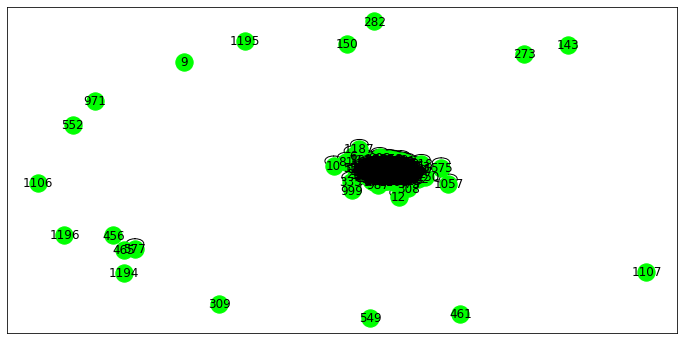

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [80]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.002181733925793541, 742),
 (0.002102377153100477, 244),
 (0.0020697938139060124, 17),
 (0.0019909810330333635, 8),
 (0.001961625772185249, 449),
 (0.0019551285587476983, 599),
 (0.001950343691130262, 373),
 (0.0019282624624339195, 928),
 (0.001888115384872137, 96),
 (0.0018836092129943186, 154)]

In [81]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [82]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Time management.
Printing number
10987654321

American Management Association / www.amanet.org
CONTENTS

Introduction 1

10

The Psychology of Time Management 4
Determine Your Values 10

Think About Your Vision and Mission 15
Project Forward, Look Backward 20
Make Written Plans 25

Chart Your Projects 29

Create Your Daily “To-Do” List 34

Set Clear Priorities 40

Stay on Track 47

Determine Your Key Result Areas 53

American Management Association / www.amanet.org
11

12

13

14

15

16

17

18

19

20

21

Delegate to Others 59

Concentrate Single-Mindedly 62
Overcome Procrastination 67
Create Blocks of Time 71

Control Interruptions 75

Batch Your Tasks 78

Manage the Telephone 81
Conduct Effective Meetings 85
Read Faster, Remember More 89
Invest in Personal Development 93

Organize Your Work Space 96

Conclusion 98

Index 101

About the Author 105

Free Sample Chapter from Success Under Stress 107

American Management Association / www.amanet.org
Introduction

YOUR ABILITY TO ma

In [83]:
from gensim.summarization import summarize

print(summarize(content, ratio=0.2, split=False))

Time management / Brian Tracy.
development, advancing the skills of individuals to drive business success.
complete range of products and services, including classroom and virtual seminars,
Free Sample Chapter from Success Under Stress 107
YOUR ABILITY TO manage your time, as much as any other
practice in your career as an executive, will determine your
Everything you have to do requires time, and the better
you use your time, the more you will accomplish, and the
Time management is essential for maximum health and
trol of your time and your life is a major determinant of your
ing of being “out of control” of your time is the major source
and control the critical events of your life, the better you will
working day, or even double your output and your produc-
desire to get your time under control and to achieve maxi-
sion that you are going to practice good time management
you have become an effective time manager.
And finally, the most important key to success in life, the
time manage

In [84]:
print(summarize(content, word_count=75, split=False))

important solutions to effective time management that
Good time management and personal productivity
The good news is that time management is a business
People who manage their time well feel positive, confi-
All successful time managers think on paper and work
cent of working time is spent on C activities, things that
Before you begin work, take some time to think slowly,
important, you immediately start work on those tasks that
feel | need to work all the time.


In [85]:
sentences = nltk.sent_tokenize(content)
len(sentences)

1265